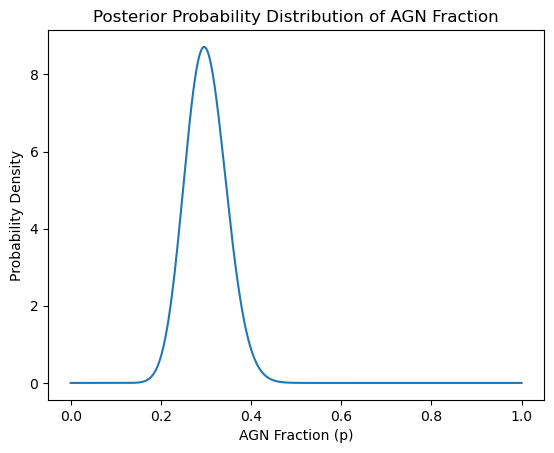

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observed data
total_galaxies = 100
agn_galaxies = 30

# Calculate the parameters for the Beta distribution
alpha = agn_galaxies
beta_param = total_galaxies - agn_galaxies

# Define the range of values for p (AGN fraction)
p_values = np.linspace(0, 1, 1000)

# Calculate the PDF of the Beta distribution
pdf_values_b = beta.pdf(p_values, alpha, beta_param)

# Plot the posterior probability distribution
plt.plot(p_values, pdf_values_b)
plt.xlabel('AGN Fraction (p)')
plt.ylabel('Probability Density')
plt.title('Posterior Probability Distribution of AGN Fraction')
plt.show()


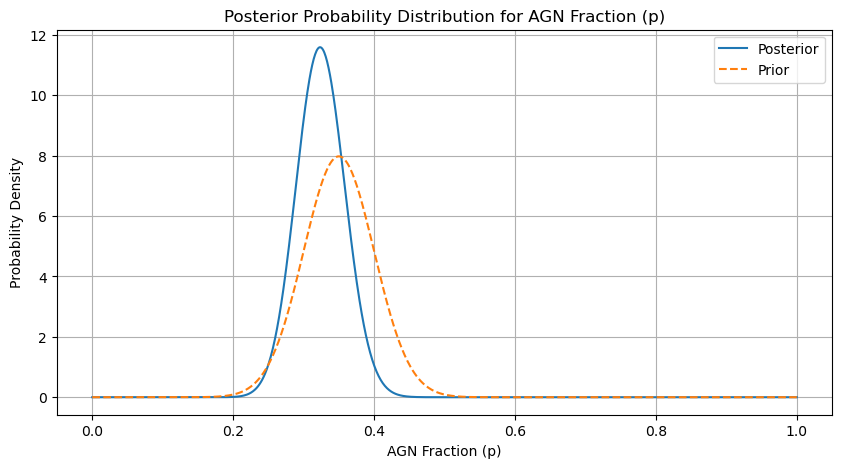

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# Parameters from the problem
observed_AGN = 30  # Number of observed AGN galaxies
total_galaxies = 100  # Total number of galaxies
prior_mean = 0.35
prior_std = 0.05

# Range of p values
p_values = np.linspace(0, 1, 1000)

# Calculate the likelihood
likelihood = binom.pmf(observed_AGN, total_galaxies, p_values)

# Calculate the prior
prior = norm.pdf(p_values, loc=prior_mean, scale=prior_std)

# Calculate the unnormalized posterior
posterior_unnormalized = likelihood * prior

# Normalize the posterior
posterior = posterior_unnormalized / np.trapz(posterior_unnormalized, p_values)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(p_values, posterior, label='Posterior')
plt.plot(p_values, prior, label='Prior', linestyle='--')
plt.xlabel('AGN Fraction (p)')
plt.ylabel('Probability Density')
plt.title('Posterior Probability Distribution for AGN Fraction (p)')
plt.legend()
plt.grid(True)
plt.show()


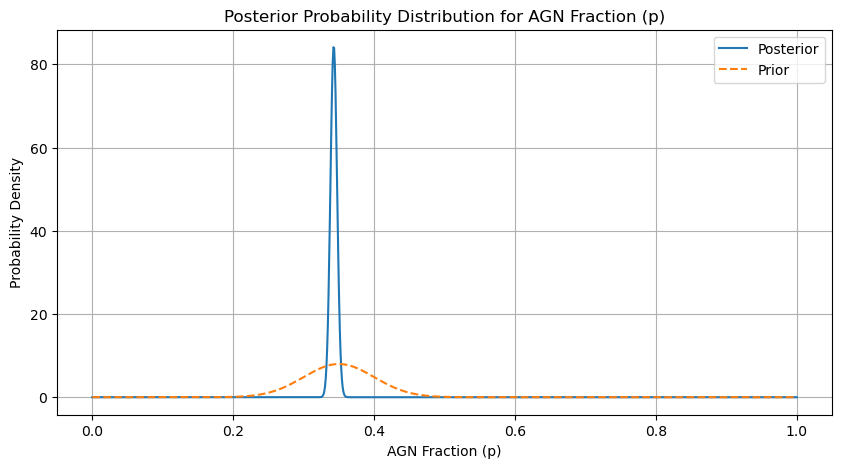

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# Parameters from the problem
observed_AGN = 3427  # Number of observed AGN galaxies
total_galaxies = 10000  # Total number of galaxies
prior_mean = 0.35
prior_std = 0.05

# Range of p values
p_values = np.linspace(0, 1, 1000)

# Calculate the likelihood
likelihood = binom.pmf(observed_AGN, total_galaxies, p_values)

# Calculate the prior
prior = norm.pdf(p_values, loc=prior_mean, scale=prior_std)

# Calculate the unnormalized posterior
posterior_unnormalized = likelihood * prior

# Normalize the posterior
posterior = posterior_unnormalized / np.trapz(posterior_unnormalized, p_values)


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(p_values, posterior, label='Posterior')
plt.plot(p_values, prior, label='Prior', linestyle='--')
plt.xlabel('AGN Fraction (p)')
plt.ylabel('Probability Density')
plt.title('Posterior Probability Distribution for AGN Fraction (p)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [12]:

poster_cal = Cal_sample_statistic(posterior)
mu = poster_cal.mean()
sigma = poster_cal.StandardDeviation()


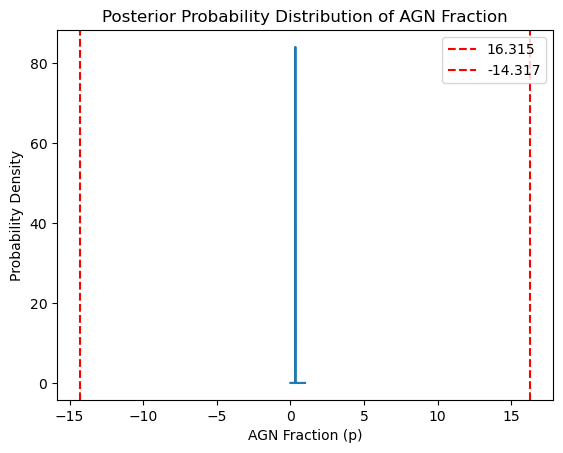

In [13]:
upper_limit = mu + 2*sigma
lower_limit = mu - 2*sigma

label_upper = "{:.3f}".format(upper_limit)
label_lower = "{:.3f}".format(lower_limit)

plt.figure()
plt.plot(p_values, posterior)
plt.fill_between(p_values, posterior,  where =( p_values<upper_limit) & (p_values>lower_limit), color = 'lightgreen', alpha=0.5)
plt.axvline(x=upper_limit, color='red', linestyle='--', label=f"{label_upper}")
plt.axvline(x=lower_limit, color='red', linestyle='--', label=f"{label_lower}")
plt.xlabel('AGN Fraction (p)')
plt.ylabel('Probability Density')
plt.title('Posterior Probability Distribution of AGN Fraction')
plt.legend()
plt.show()